In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Gene and Variation Data

data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()



Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [3]:
# Number of points for each class
data['Class'].value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [4]:
#Loading text-based clinical literature data

data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [5]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [6]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 111.67545306000001 seconds


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [7]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [8]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [9]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [10]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

In [11]:
result[['Gene','Variation','Class']].to_csv('out.csv',index=False)

In [12]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (5*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count.index ,norm_count,  order = norm_count.index)
    plt.ylabel('fraction/percent', fontsize = 20)
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

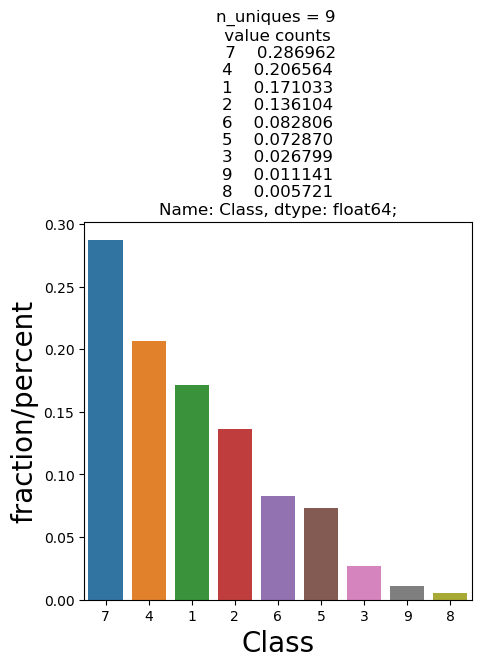

In [13]:
UVA_category(result, ['Class'])

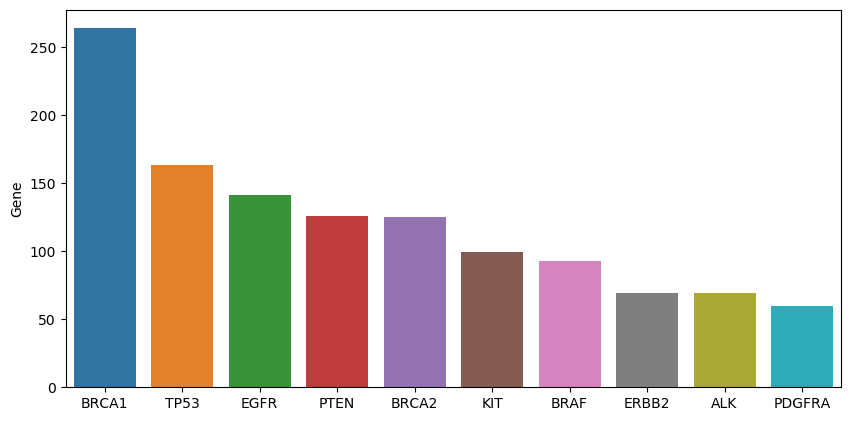

In [14]:
top = result['Gene'].value_counts().head(10)
plt.figure(figsize = (10,5), dpi = 100)
sns.barplot(top.index ,top ,  order = top.index)

In [15]:
top

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: Gene, dtype: int64

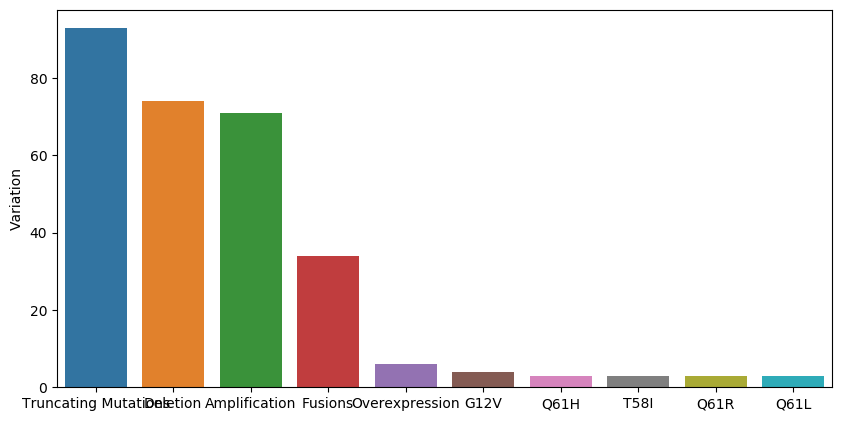

In [16]:
top = result['Variation'].value_counts().head(10)
plt.figure(figsize = (10,5), dpi = 100)
sns.barplot(top.index ,top ,  order = top.index)

In [17]:
top

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
Q61H                     3
T58I                     3
Q61R                     3
Q61L                     3
Name: Variation, dtype: int64

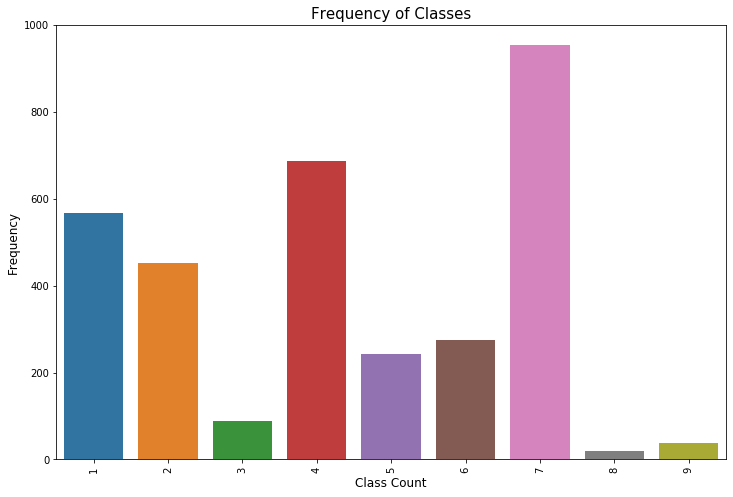

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=result)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

Genes that appear less than 2 times: 26.89%
Genes that appear less than 5 times: 53.03%
Genes that appear less than 10 times: 71.59%
Genes that appear less than 20 times: 82.95%
Genes that appear less than 50 times: 95.08%
Genes that appear less than 100 times: 98.11%
Genes that appear less than 300 times: 100.0%


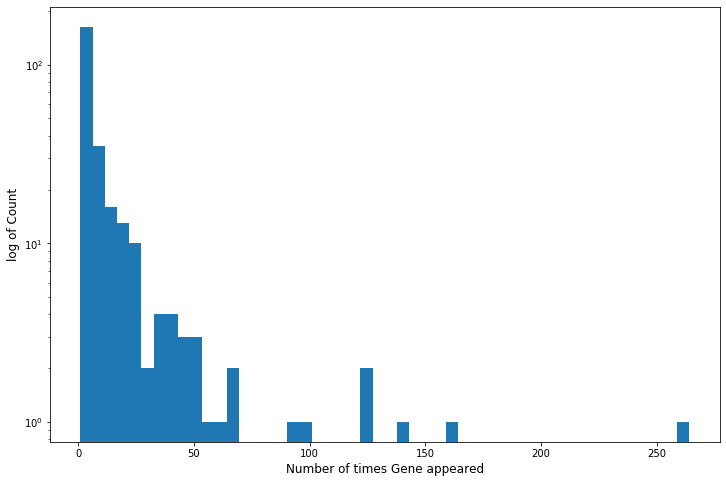

In [19]:
train_genes = result.groupby('Gene')['Gene'].count()

for i in [2, 5, 10, 20, 50, 100, 300]:
    print('Genes that appear less than {} times: {}%'.format(i, round((train_genes < i).mean() * 100, 2)))

plt.figure(figsize=(12, 8))
plt.hist(train_genes.values, bins=50, log=True)
plt.xlabel('Number of times Gene appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

Genes that appear less than 2 times: 98.33%
Genes that appear less than 3 times: 99.63%
Genes that appear less than 5 times: 99.83%
Genes that appear less than 50 times: 99.9%
Genes that appear less than 100 times: 100.0%


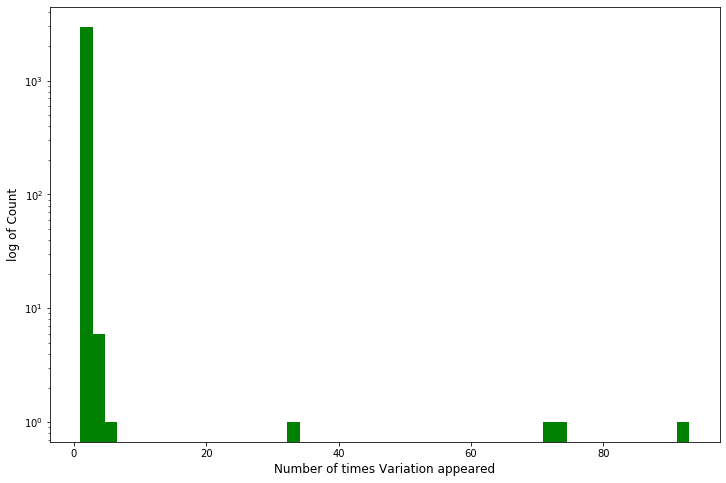

In [20]:
train_variation = result.groupby('Variation')['Variation'].count()

for i in [2,3,5,50,100]:
    print('Genes that appear less than {} times: {}%'.format(i, round((train_variation < i).mean() * 100, 2)))

plt.figure(figsize=(12, 8))
plt.hist(train_variation.values, bins=50, log=True, color='green')
plt.xlabel('Number of times Variation appeared', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.show()

In [21]:
result["Text_num_words"] = result["TEXT"].apply(lambda x: len(str(x).split()) )
result["Text_num_chars"] = result["TEXT"].apply(lambda x: len(str(x)) )

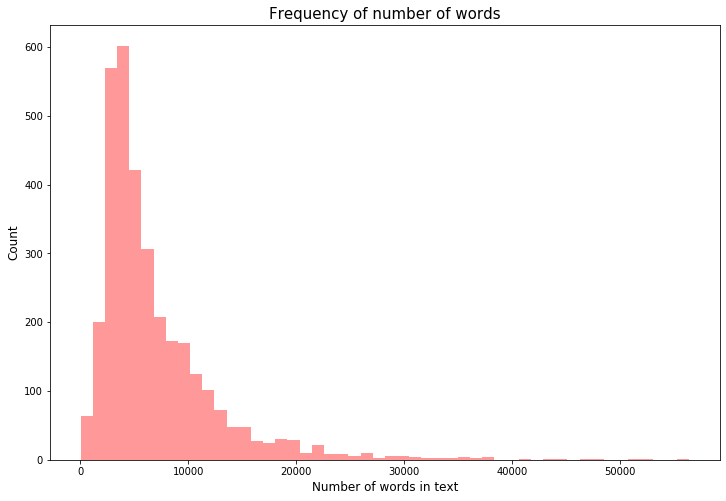

In [22]:
plt.figure(figsize=(12, 8))
sns.distplot(result.Text_num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

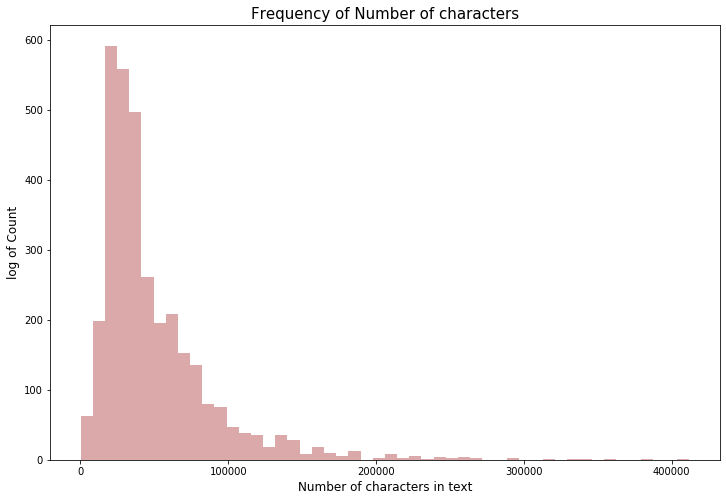

In [23]:
plt.figure(figsize=(12, 8))
sns.distplot(result.Text_num_chars.values, bins=50, kde=False, color='brown')
plt.xlabel('Number of characters in text', fontsize=12)
plt.ylabel('log of Count', fontsize=12)
plt.title("Frequency of Number of characters", fontsize=15)
plt.show()

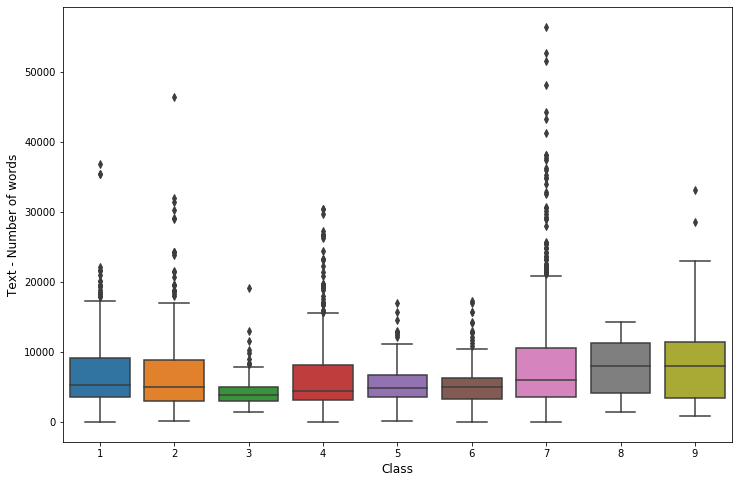

In [24]:
#check if we could use the number of words in the text has predictive power

plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Text_num_words', data=result)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Text - Number of words', fontsize=12)
plt.show()

This might be useful to discriminate some of the classes like class 3 from others. So might be good to have in the input features.

[Text(0.5, 0, 'Frequency')]

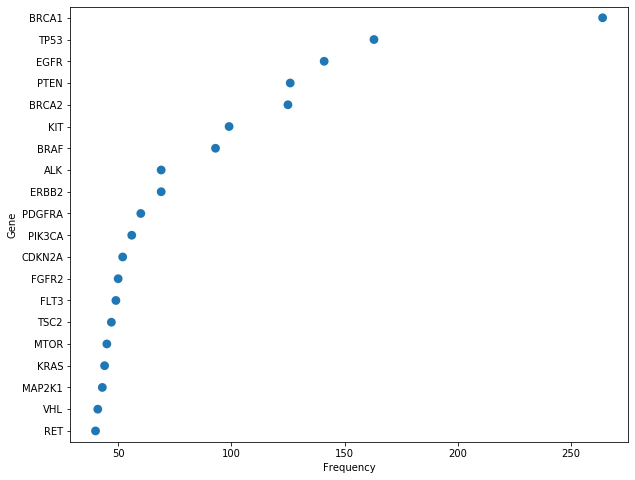

In [26]:
gene_count = result.groupby('Gene')['ID'].count().reset_index()
sorted_gene_count = gene_count.sort_values('ID', ascending=False)
sorted_gene_count_top_20 = sorted_gene_count[:20]
plt.figure(figsize = (10,8))
ax = sns.pointplot(x="ID", y="Gene", data=sorted_gene_count_top_20,join = False)
ax.set(xlabel="Frequency")

A relatively small group of Gene levels make up a sizeable part of the feature values in  train  data.

[Text(0, 0.5, 'Frequency')]

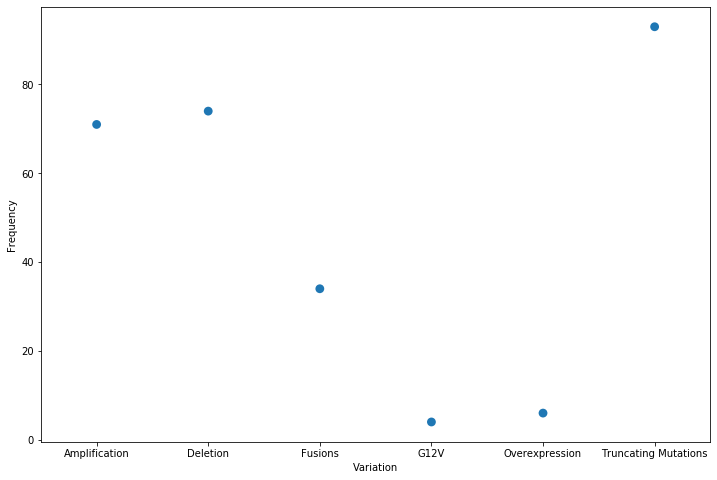

In [27]:
variation_count = result.groupby('Variation')['ID'].count().reset_index()
frequent_variation_count= variation_count[variation_count['ID'] > 3]
plt.figure(figsize = (12,8))
ax = sns.pointplot(x="Variation", y="ID", data=frequent_variation_count,join = False)
ax.set(ylabel="Frequency")

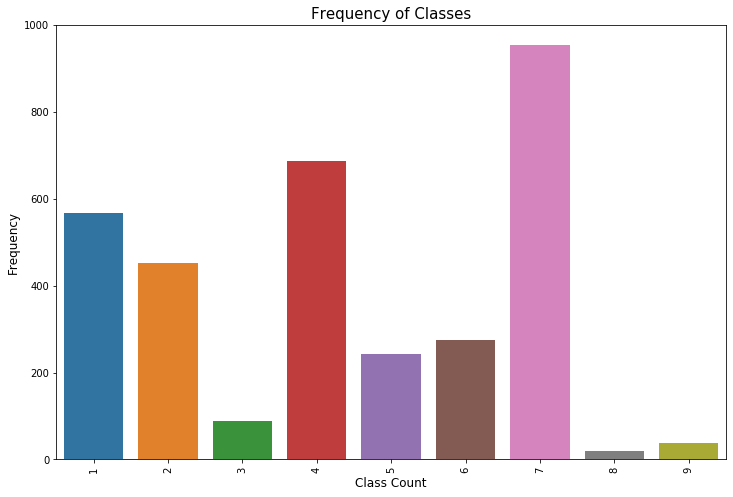

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=result)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

We find:

Class levels 3, 8, and 9 are notably under-represented

Levels 5 and 6 are of comparable, medium-low frequency

Levels 1, 2, and 4 are of comparable, medium-high frequency

Level 7 is clearly the most frequent one

#### Gene vs Class

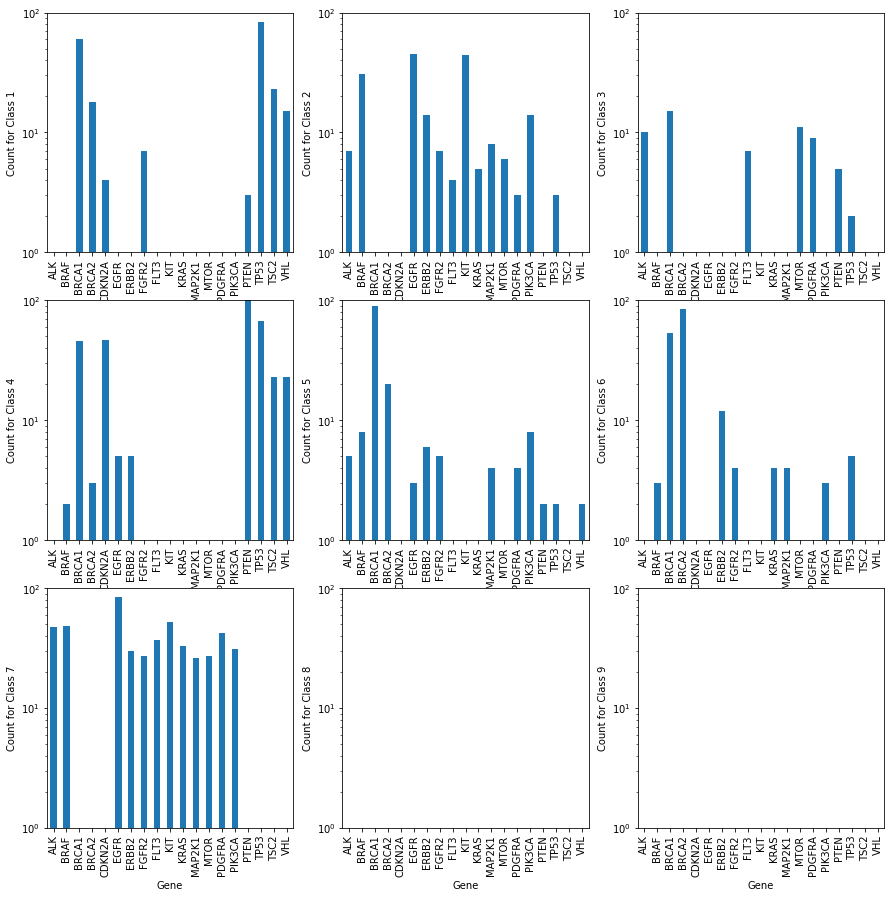

In [29]:
gene_count = result.groupby('Gene')['ID'].count().reset_index()
top_genes = gene_count[gene_count['ID'] > 40]
top_genes = top_genes['Gene'].values
result_comp = result[result['Gene'].isin(top_genes)]
data_plot = result_comp.groupby('Gene')['Class'].value_counts().unstack()
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        ax = data_plot.plot(y=((i*3+j)+1),kind ='bar', ax=axs[i][j],logy = True,legend=False,ylim=[1,100])
        ax.set(ylabel='Count for Class '+str((i*3+j)+1))
        

We see immediately that there are significant differences:

Some Genes, like “PTEN”, are predominatly present in a single Class (here: 4).

Other Genes, like “TP53”, are mainly shared between 2 classes (here: 1 and 4).

Classes 8 and 9 contain none of the most frequent Genes.

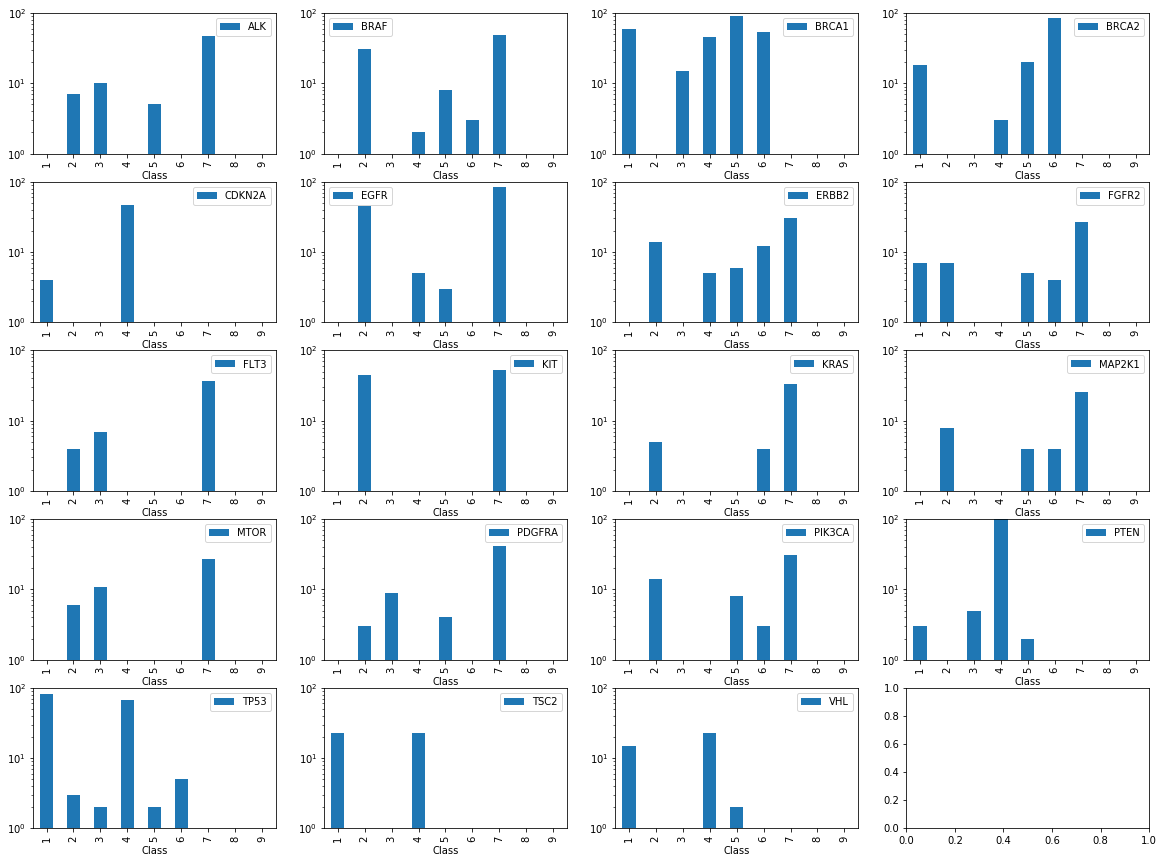

In [38]:
gene_count = result.groupby('Gene')['ID'].count().reset_index()
top_genes = gene_count[gene_count['ID'] > 40]
top_genes = top_genes['Gene'].values
result_comp = result[result['Gene'].isin(top_genes)]
data_plot = result_comp.groupby('Class')['Gene'].value_counts().unstack()
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20,15))

for i in range(5):
    for j in range(4):
        if (i*4+j) < 19:
            ax = data_plot.plot(y=data_plot.columns[((i*4+j))],kind ='bar', ax=axs[i][j],logy = True,legend=True,ylim=[1,100])
        else:
            break
        